In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [5]:
road=pd.read_csv("C:\Jahir\MGP Projects\P1\RTA Dataset.csv")

In [6]:
road.shape

(12316, 32)

In [7]:
# renaming columns
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
road.rename(columns=col_map, inplace=True)

In [8]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [9]:
road.dtypes

time                       object
day_of_week                object
driver_age                 object
driver_sex                 object
educational_level          object
vehicle_driver_relation    object
driving_experience         object
vehicle_type               object
vehicle_owner              object
service_year               object
vehicle_defect             object
accident_area              object
lanes                      object
road_allignment            object
junction_type              object
surface_type               object
road_surface_conditions    object
light_condition            object
weather_condition          object
collision_type             object
vehicles_involved           int64
casualties                  int64
vehicle_movement           object
casualty_class             object
casualty_sex               object
casualty_age               object
casualty_severity          object
casualty_work              object
casualty_fitness           object
pedestrian_mov

In [10]:
road.head(5)

,time,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [11]:
road.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [12]:
road.describe(include='object').T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


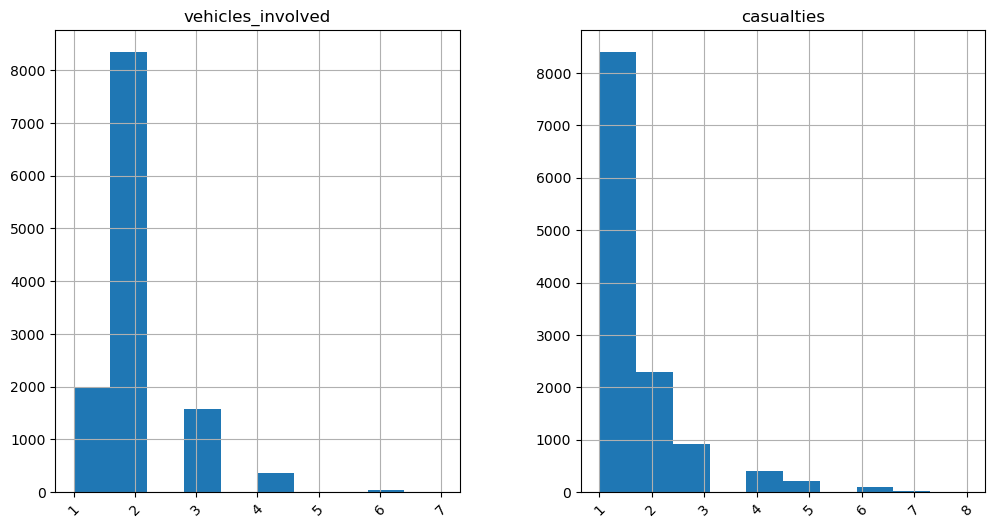

In [13]:
road.hist(figsize=(12,6), xrot=45)
plt.show()

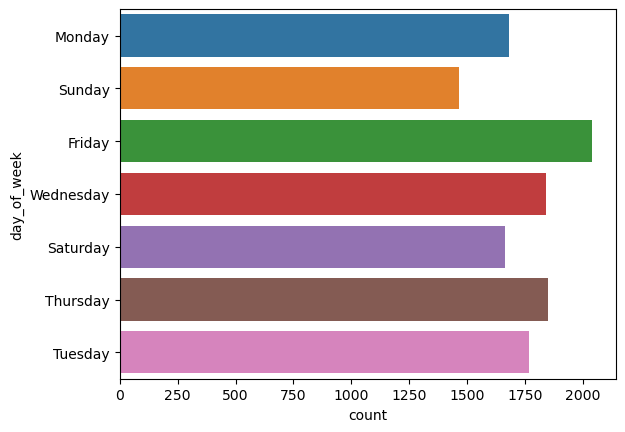

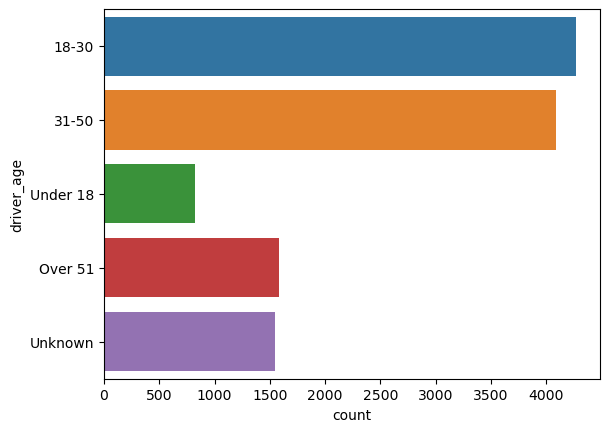

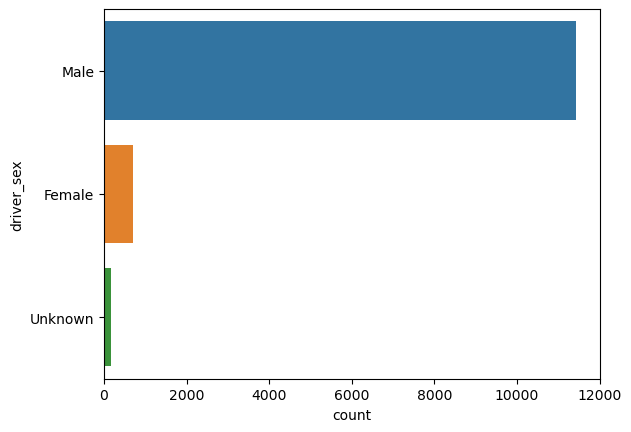

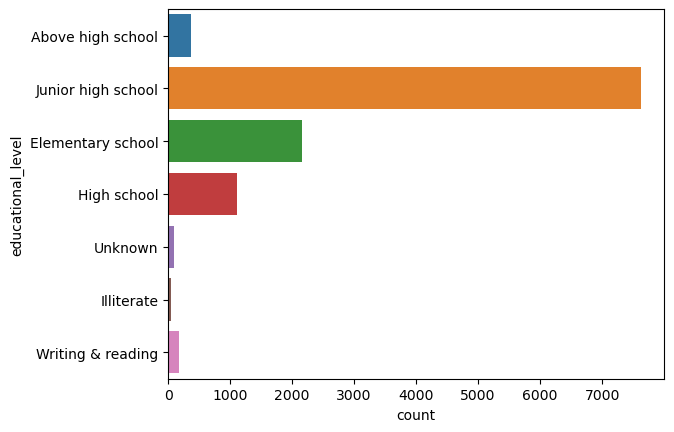

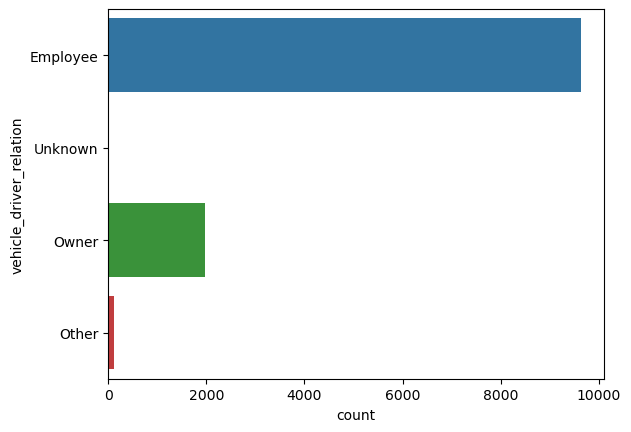

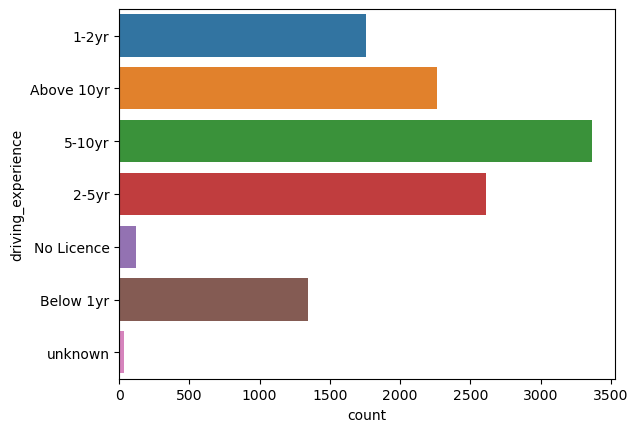

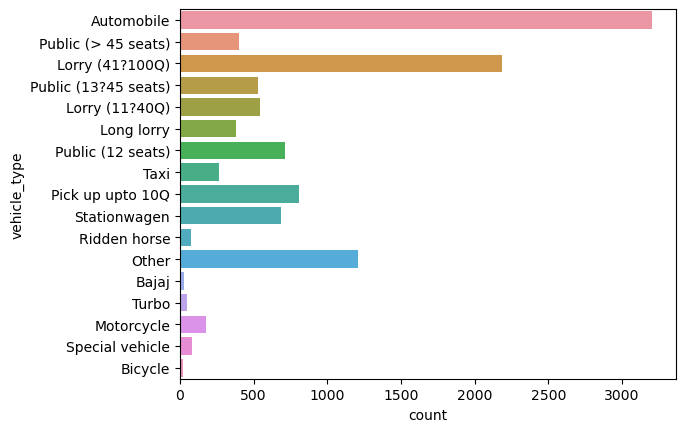

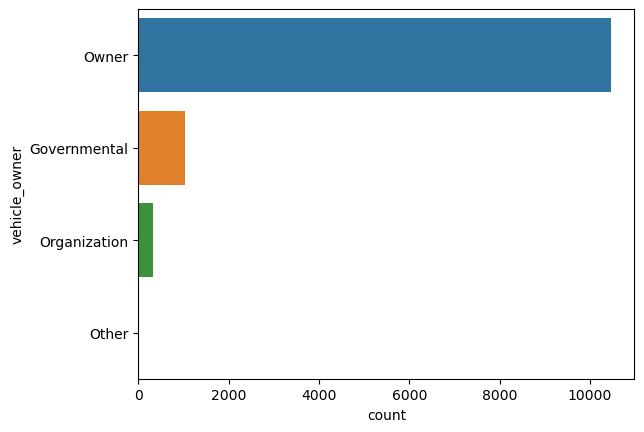

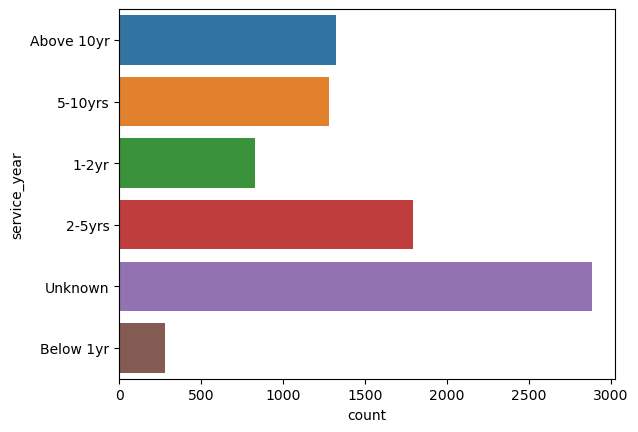

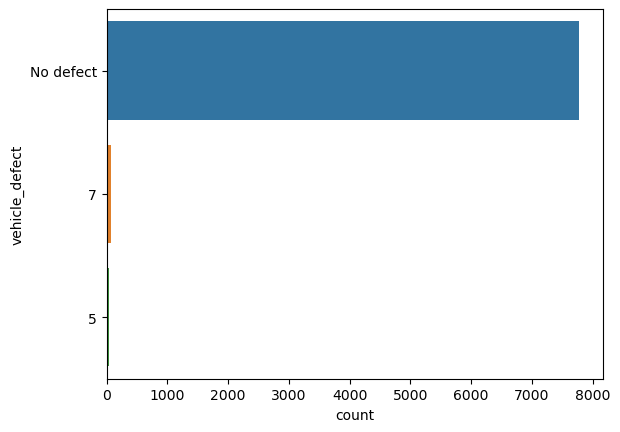

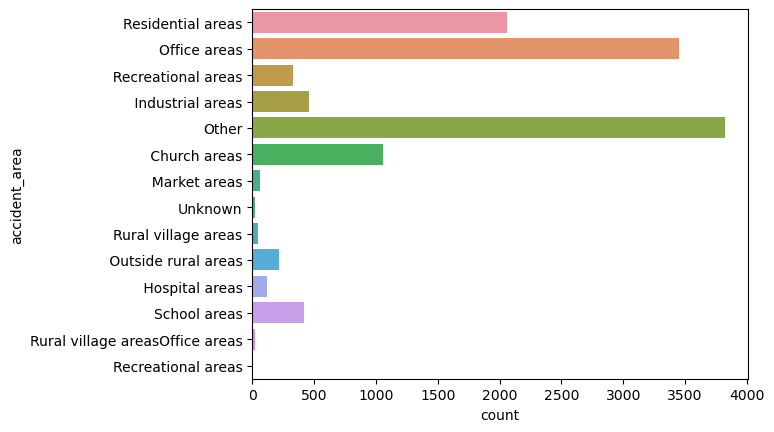

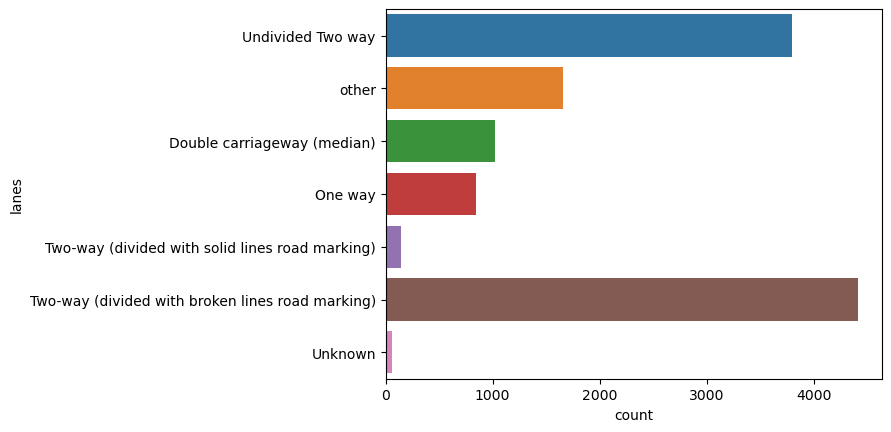

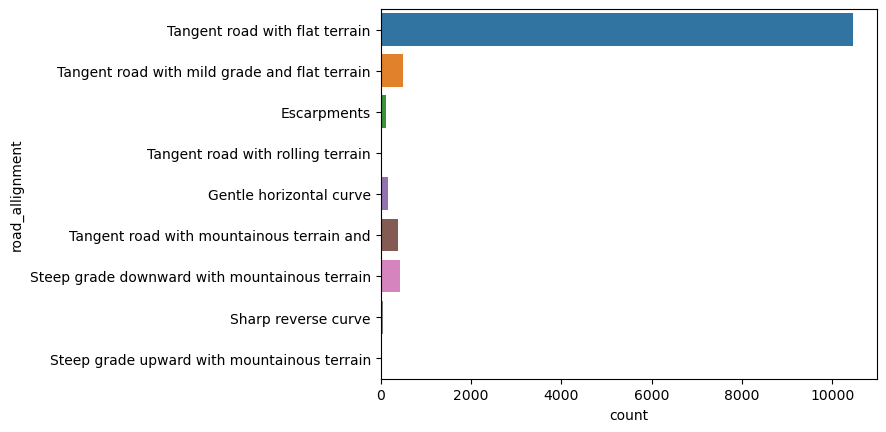

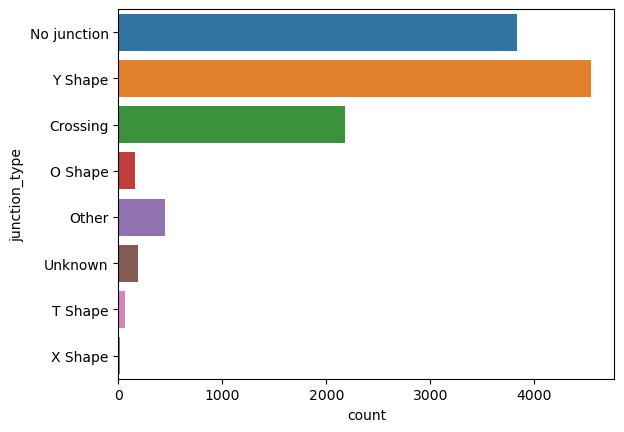

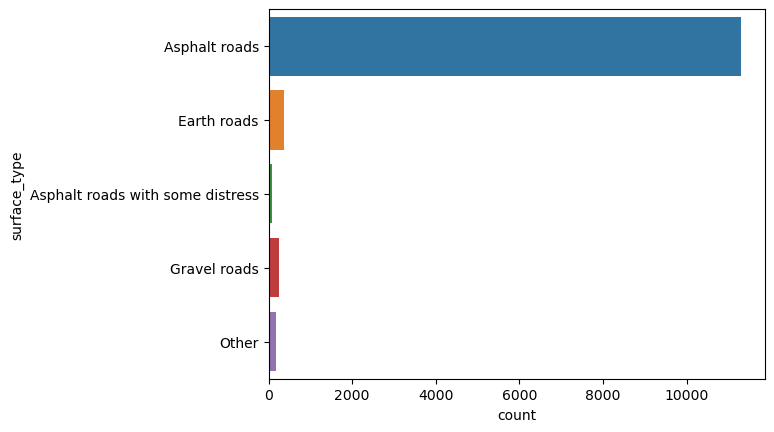

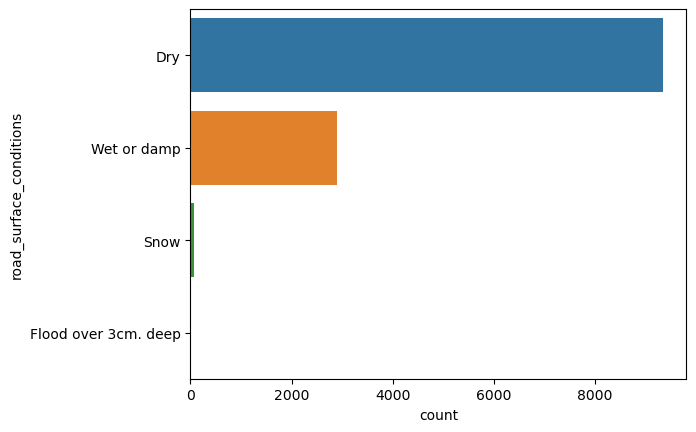

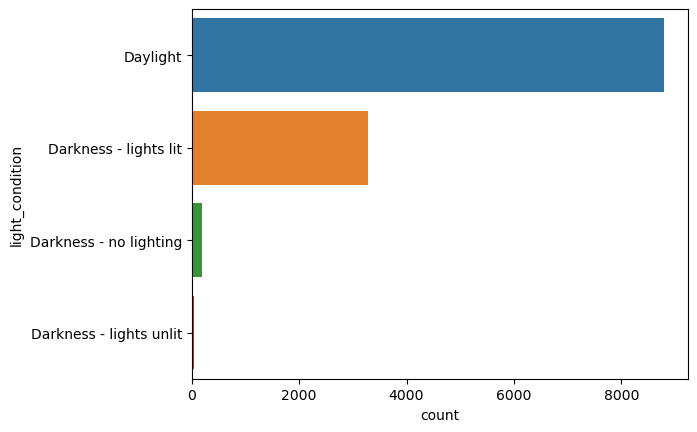

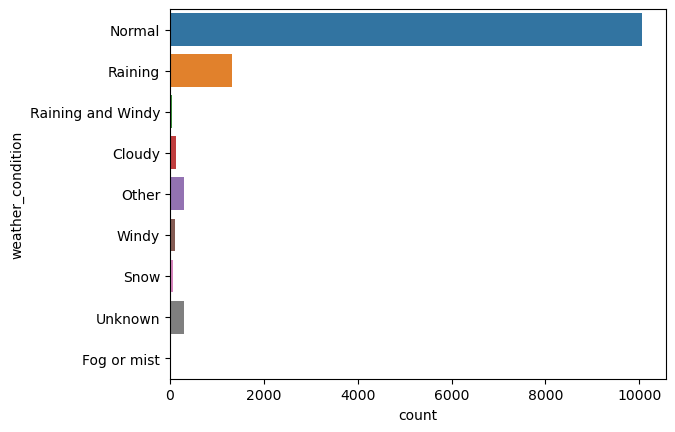

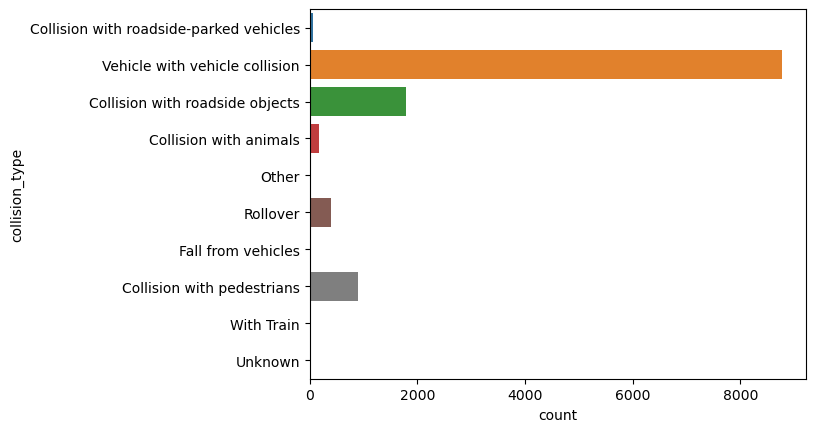

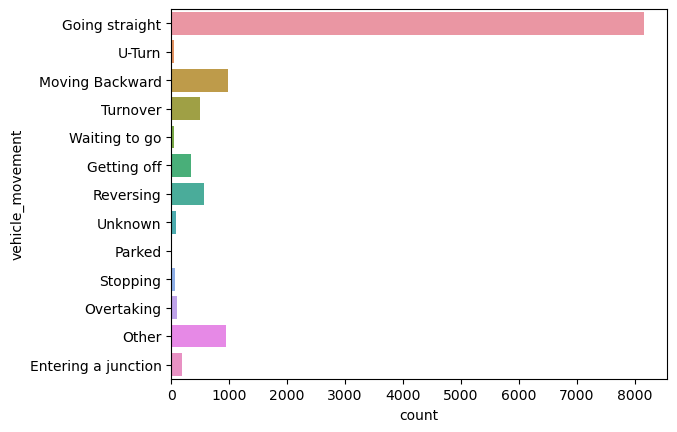

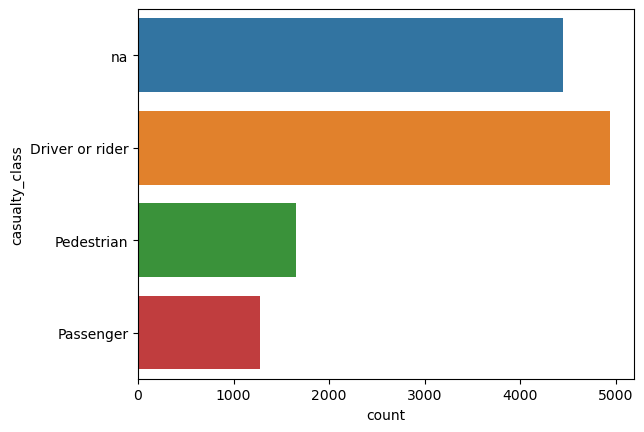

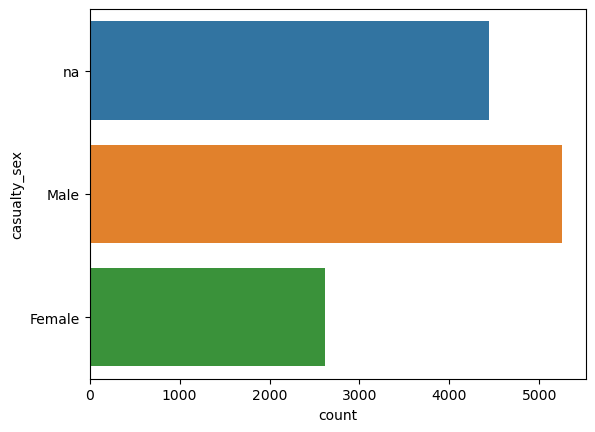

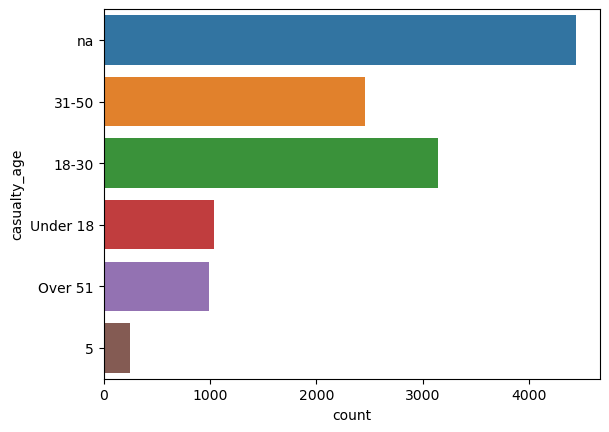

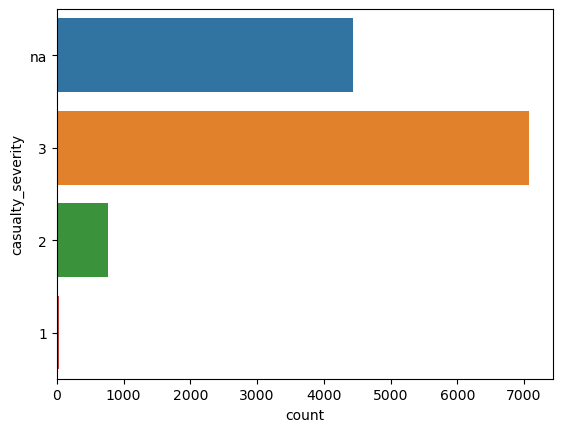

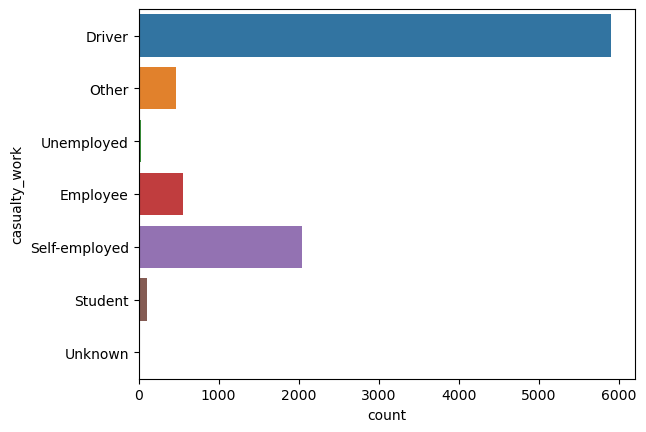

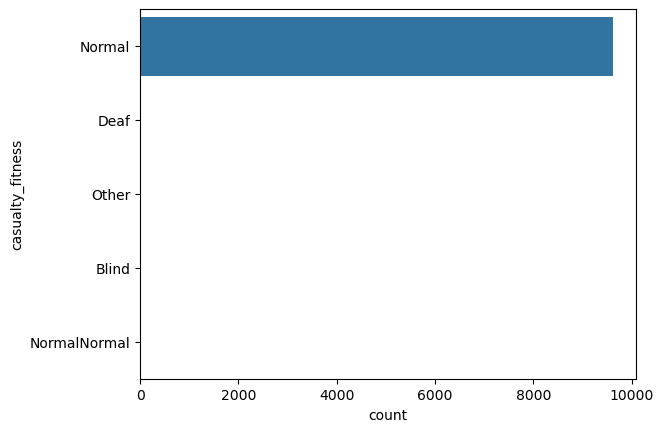

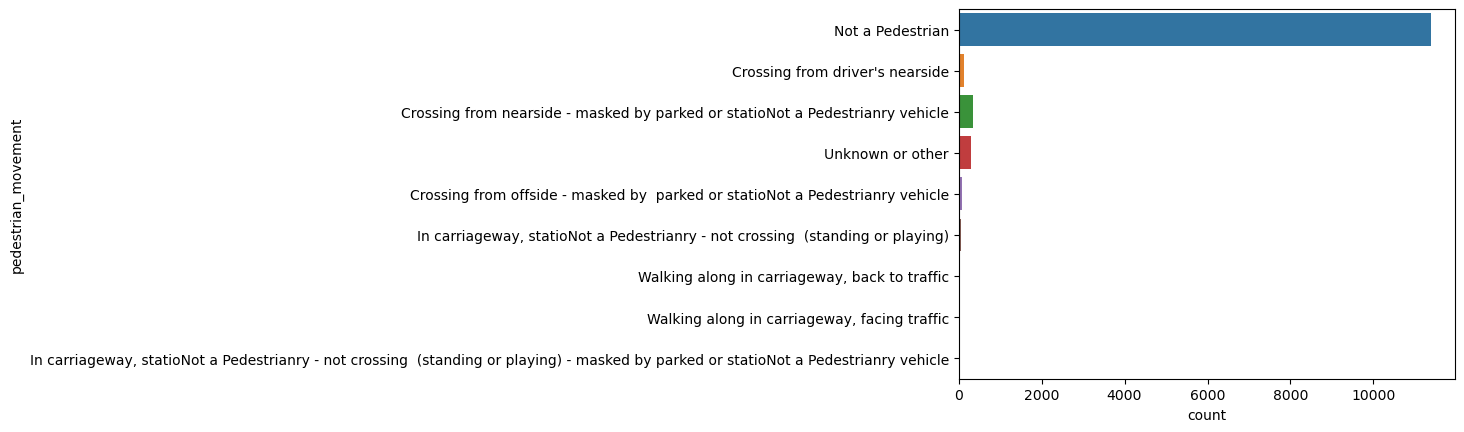

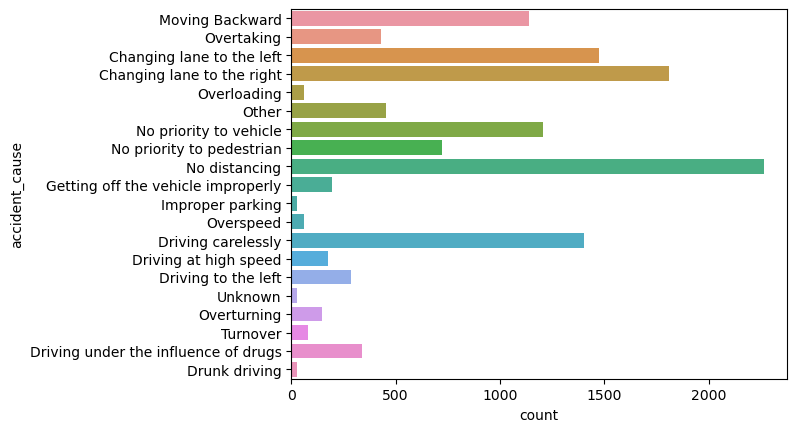

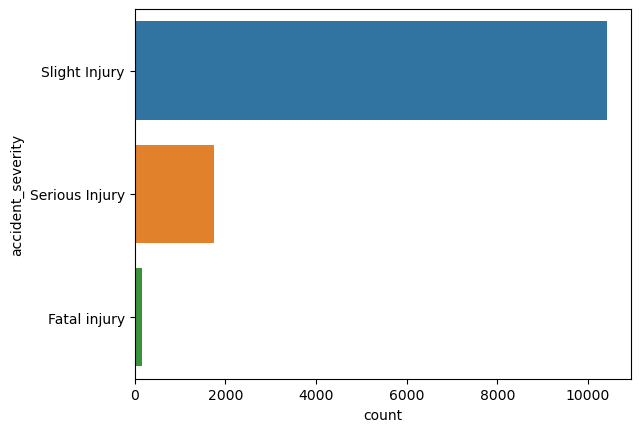

In [14]:
for col in road.select_dtypes(include='object'):
    if road[col].nunique() <= 20:
        sns.countplot(y=col, data=road)
        plt.show()

In [15]:
road['accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: accident_severity, dtype: int64

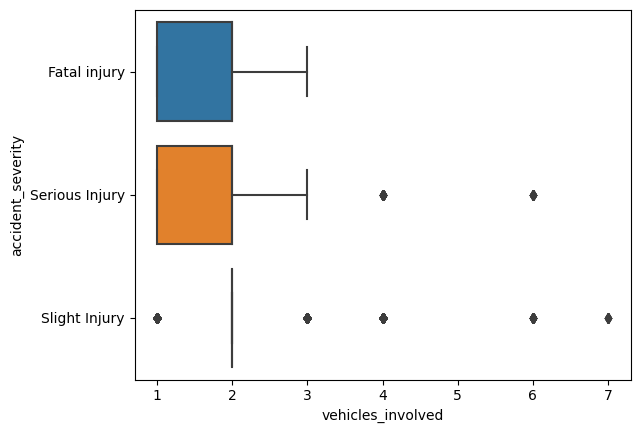

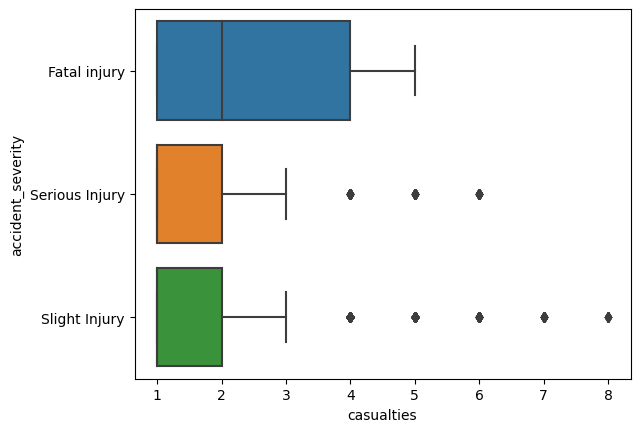

In [16]:
num_cols = ['vehicles_involved','casualties']
for col in num_cols:
    sns.boxplot(y = road['accident_severity'].astype('category'), x = col, data=road)
    plt.show()

In [17]:
for col in road.select_dtypes(include='object'):
    if road[col].nunique() <=5:
        display(pd.crosstab(road['accident_severity'], road[col], normalize='index'))
        #display(pd.crosstab(data['target'], data[col]))

driver_age,18-30,31-50,Over 51,Under 18,Unknown
accident_severity,,,,,
Fatal injury,0.392405,0.341772,0.151899,0.075949,0.037975
Serious Injury,0.346529,0.310384,0.147447,0.096959,0.098680
Slight Injury,0.346135,0.335286,0.125204,0.061834,0.131541


driver_sex,Female,Male,Unknown
accident_severity,,,
Fatal injury,0.031646,0.962025,0.006329
Serious Injury,0.059667,0.930006,0.010327
Slight Injury,0.056841,0.927892,0.015266


vehicle_driver_relation,Employee,Other,Owner,Unknown
accident_severity,,,,
Fatal injury,0.765101,0.006711,0.228188,0.000000
Serious Injury,0.817963,0.008439,0.172996,0.000603
Slight Injury,0.821432,0.010877,0.166381,0.001309


vehicle_owner,Governmental,Organization,Other,Owner
accident_severity,,,,
Fatal injury,0.104575,0.026144,0.000000,0.869281
Serious Injury,0.078349,0.022727,0.000598,0.898325
Slight Injury,0.089320,0.026976,0.002098,0.881607


vehicle_defect,5,7,No defect
accident_severity,,,
Fatal injury,0.000000,0.000000,1.000000
Serious Injury,0.005240,0.012227,0.982533
Slight Injury,0.004519,0.009339,0.986142


surface_type,Asphalt roads,Asphalt roads with some distress,Earth roads,Gravel roads,Other
accident_severity,,,,,
Fatal injury,0.942675,0.006369,0.044586,0.000000,0.006369
Serious Injury,0.926163,0.004070,0.028488,0.026163,0.015116
Slight Injury,0.930652,0.007110,0.029415,0.019188,0.013636


road_surface_conditions,Dry,Flood over 3cm. deep,Snow,Wet or damp
accident_severity,,,,
Fatal injury,0.765823,0.000000,0.000000,0.234177
Serious Injury,0.764200,0.000000,0.002295,0.233505
Slight Injury,0.757273,0.000192,0.006337,0.236198


light_condition,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
accident_severity,,,,
Fatal injury,0.417722,0.000000,0.031646,0.550633
Serious Injury,0.266781,0.004016,0.028112,0.701090
Slight Injury,0.264522,0.003169,0.013250,0.719059


casualty_class,Driver or rider,Passenger,Pedestrian,na
accident_severity,,,,
Fatal injury,0.449367,0.075949,0.170886,0.303797
Serious Injury,0.412507,0.104418,0.130809,0.352266
Slight Injury,0.398848,0.104273,0.133845,0.363034


casualty_sex,Female,Male,na
accident_severity,,,
Fatal injury,0.183544,0.512658,0.303797
Serious Injury,0.207114,0.440620,0.352266
Slight Injury,0.214114,0.422852,0.363034


casualty_severity,1,2,3,na
accident_severity,,,,
Fatal injury,0.000000,0.063291,0.632911,0.303797
Serious Injury,0.001721,0.056225,0.589788,0.352266
Slight Injury,0.002208,0.063658,0.571099,0.363034


casualty_fitness,Blind,Deaf,Normal,NormalNormal,Other
accident_severity,,,,,
Fatal injury,0.000000,0.000000,0.992126,0.000000,0.007874
Serious Injury,0.000728,0.002911,0.990539,0.002911,0.002911
Slight Injury,0.002078,0.001711,0.992787,0.001834,0.001589


accident_severity,Fatal injury,Serious Injury,Slight Injury
accident_severity,,,
Fatal injury,1.0,0.0,0.0
Serious Injury,0.0,1.0,0.0
Slight Injury,0.0,0.0,1.0


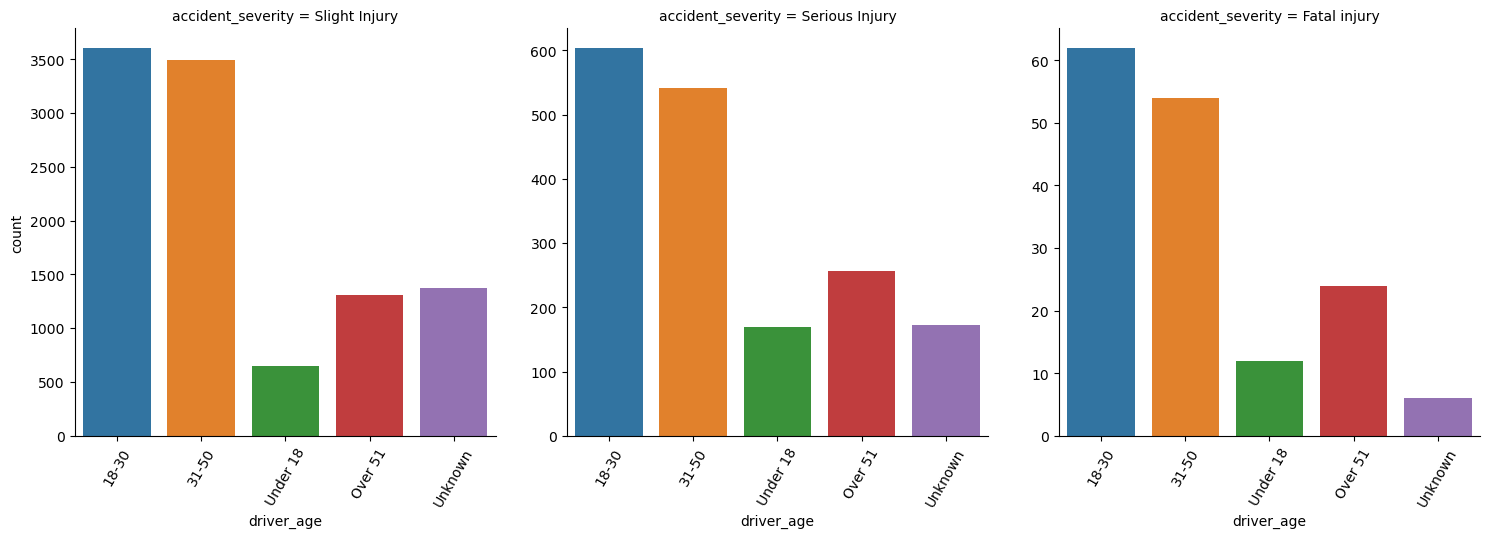

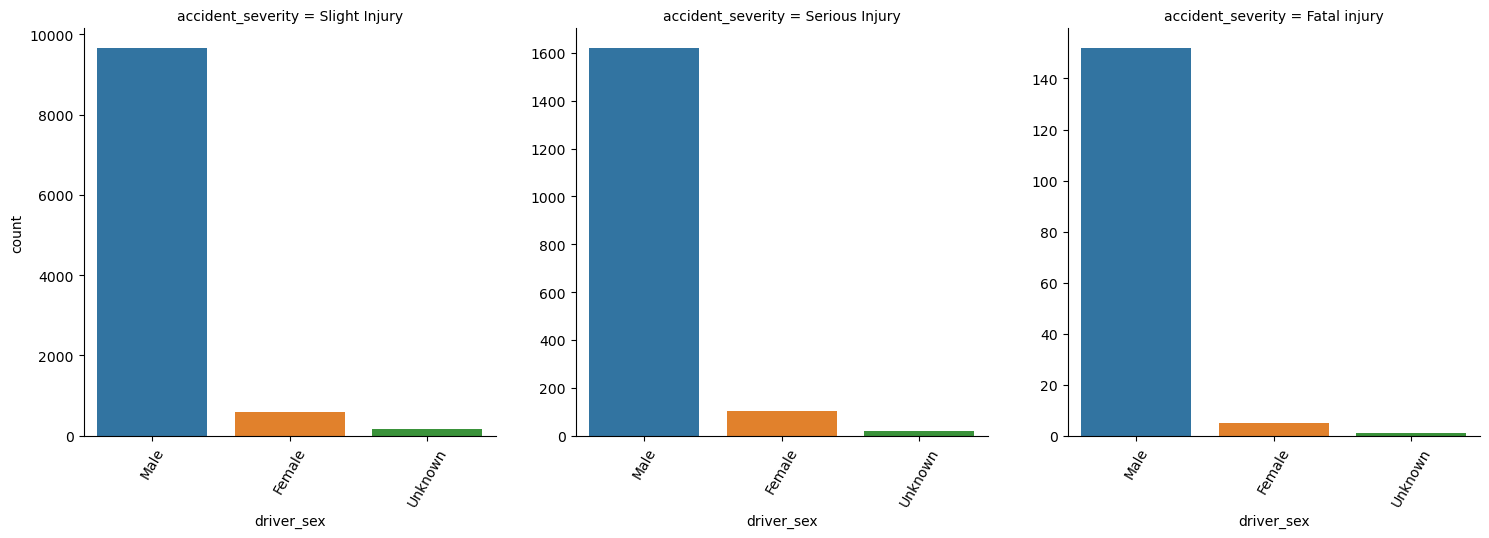

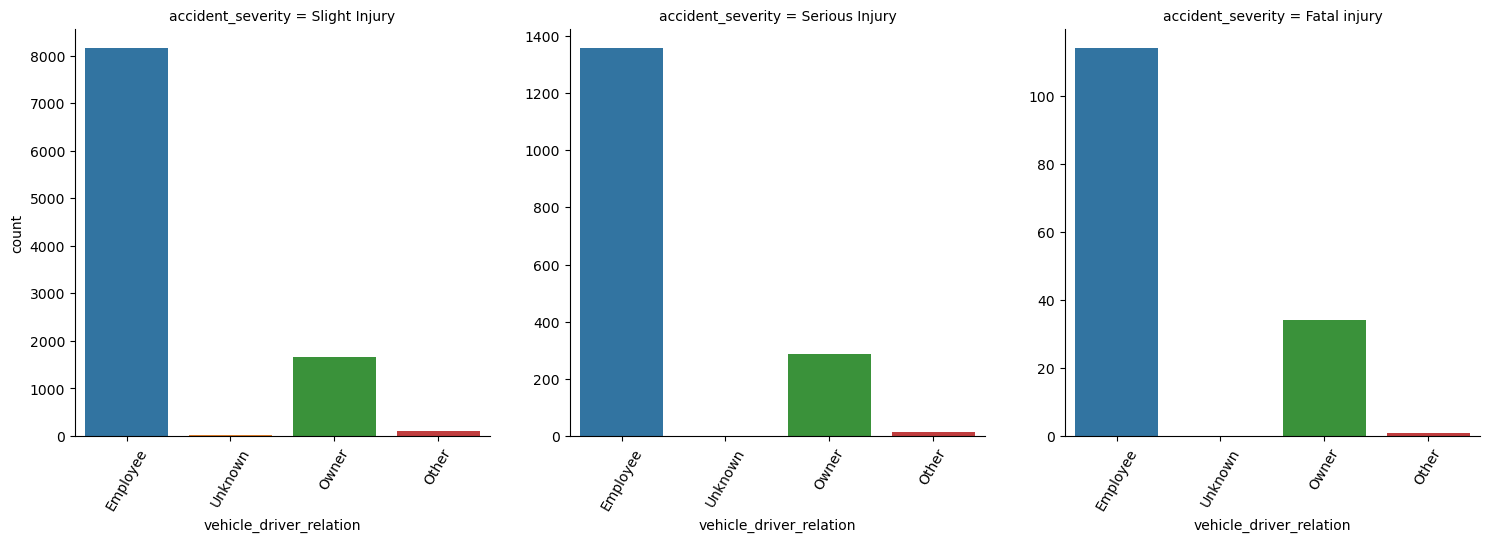

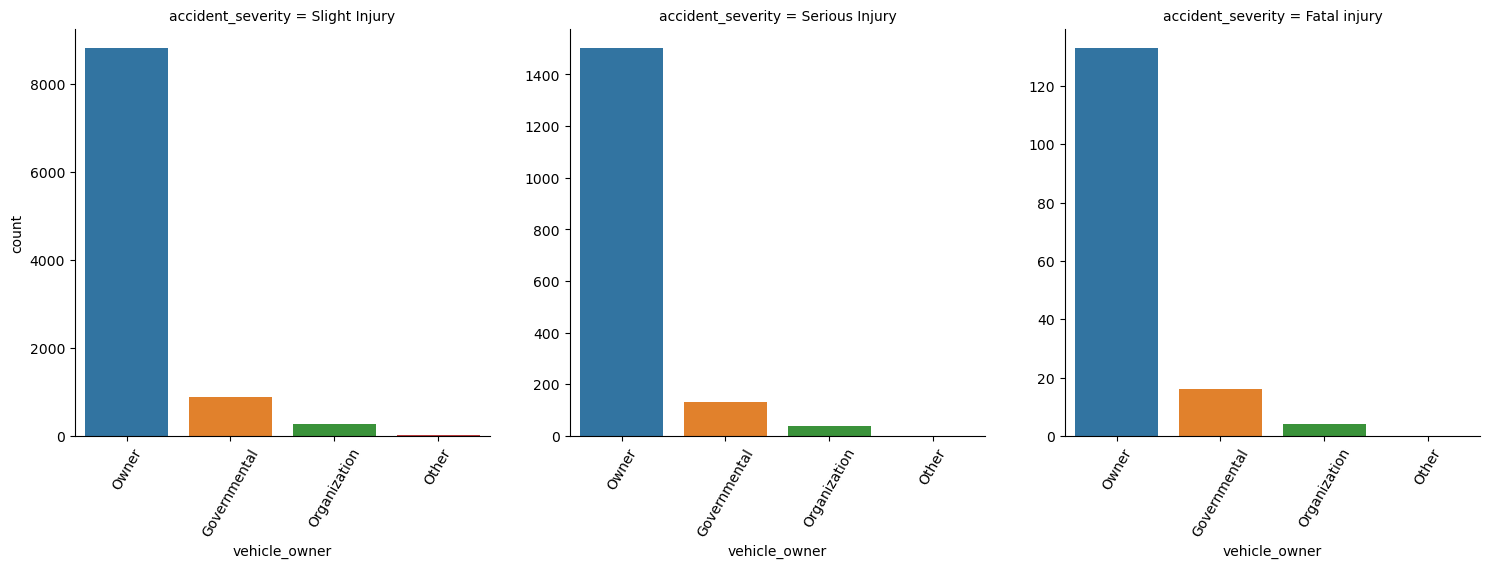

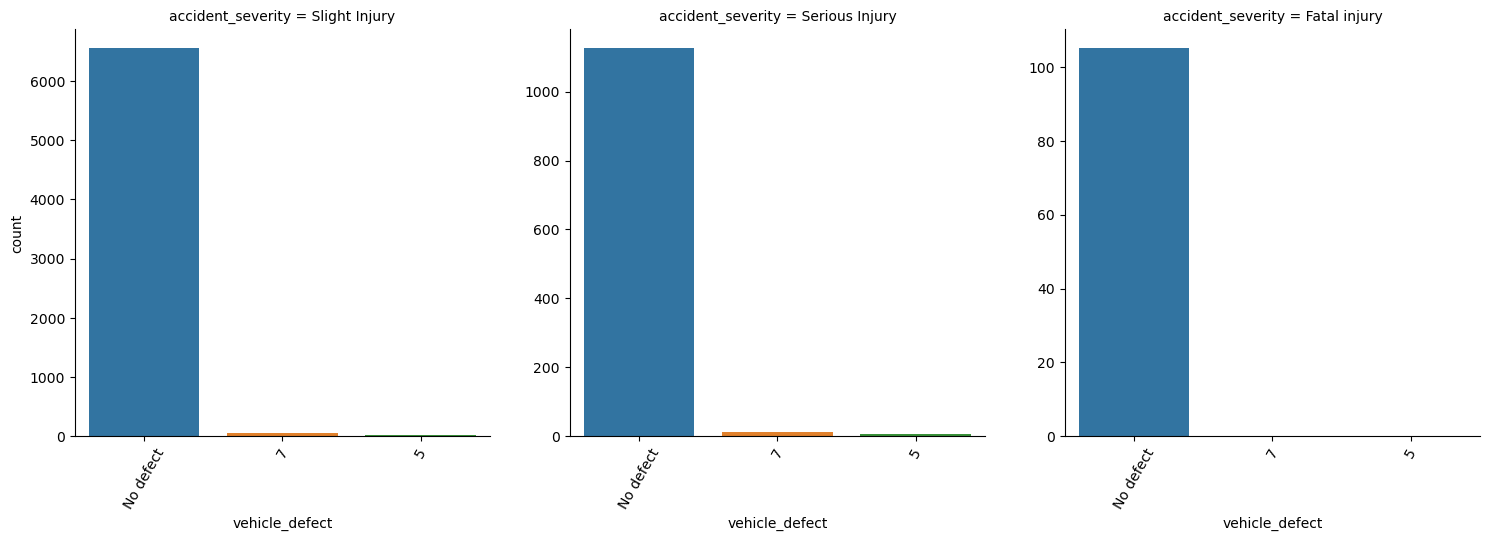

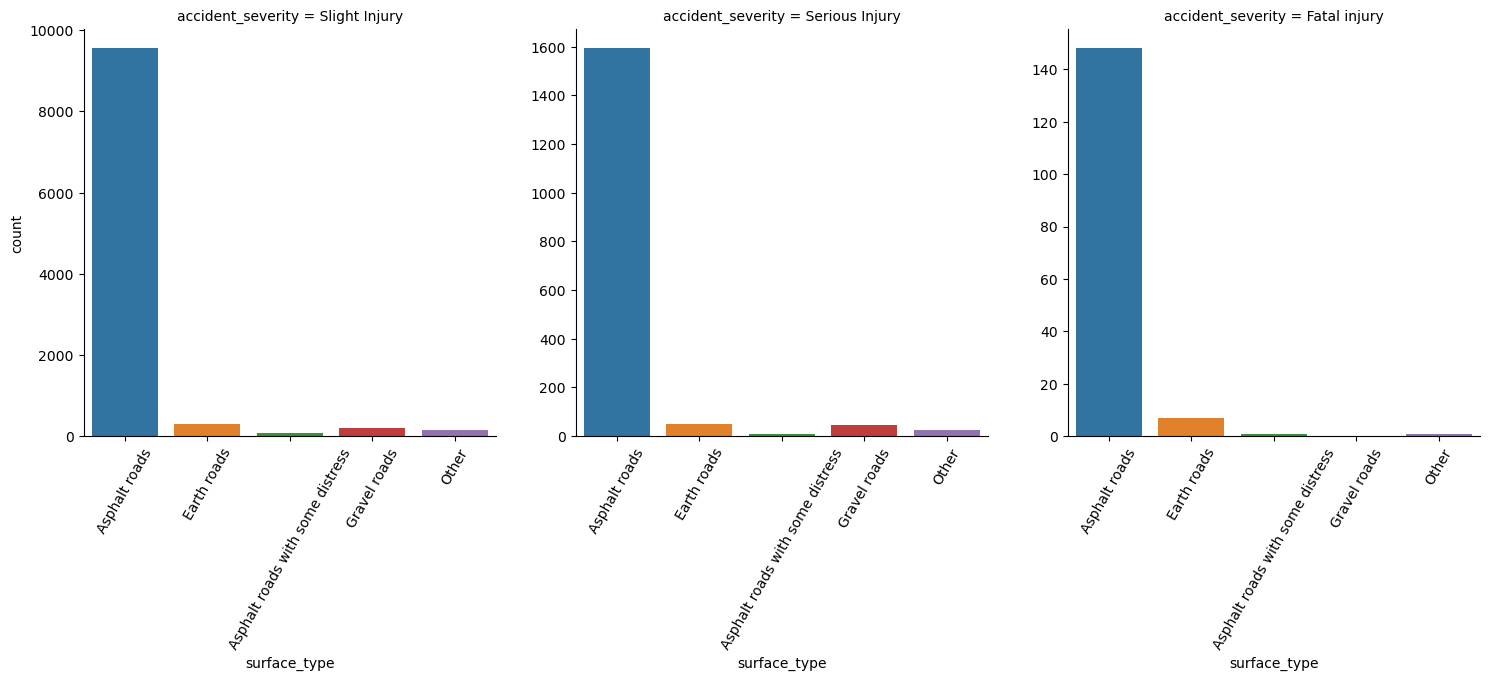

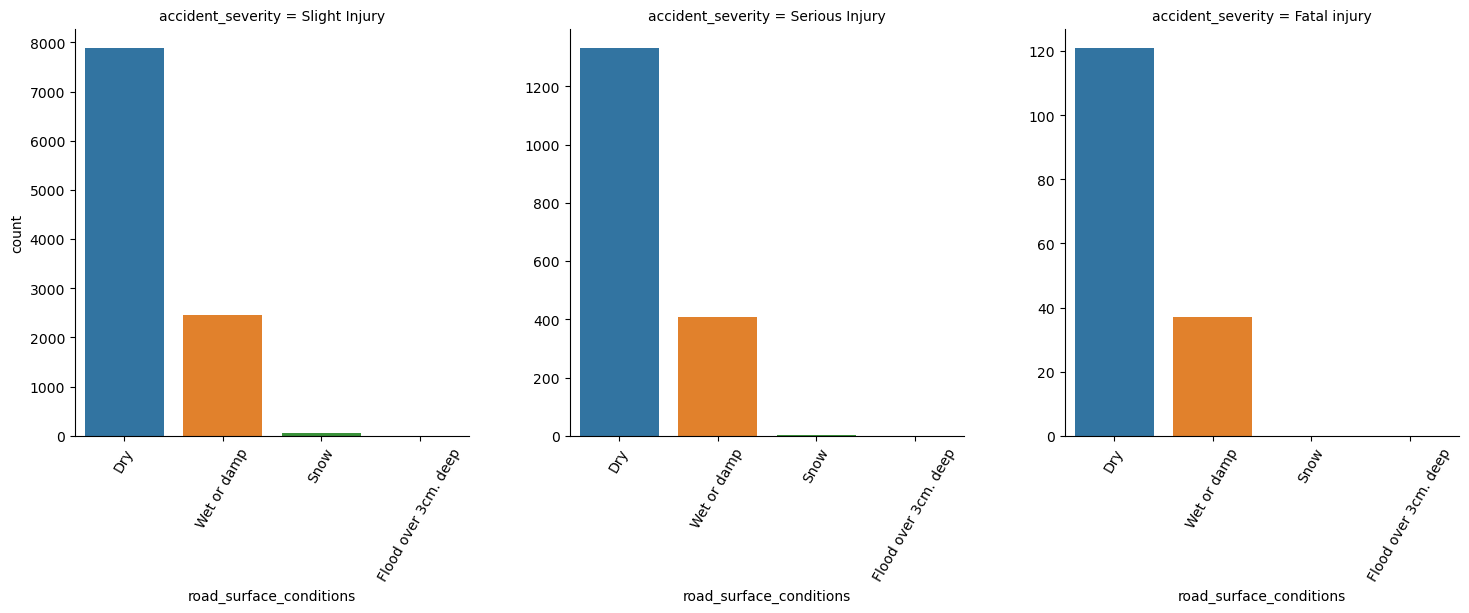

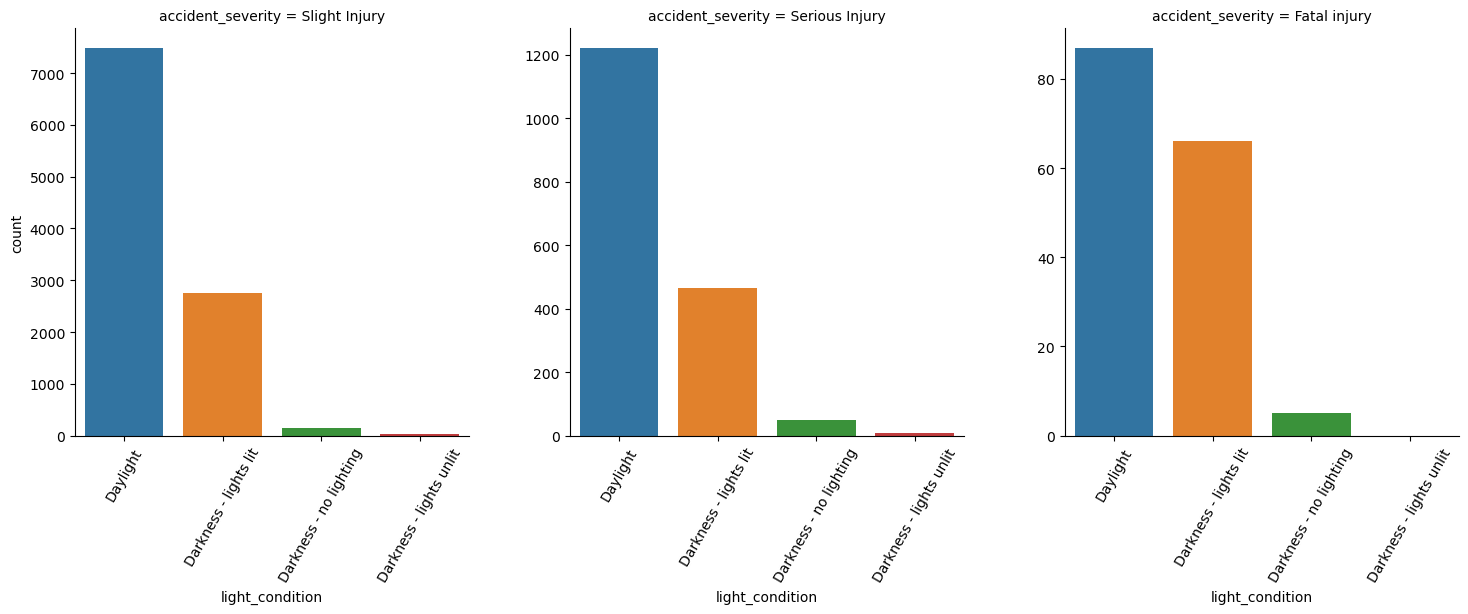

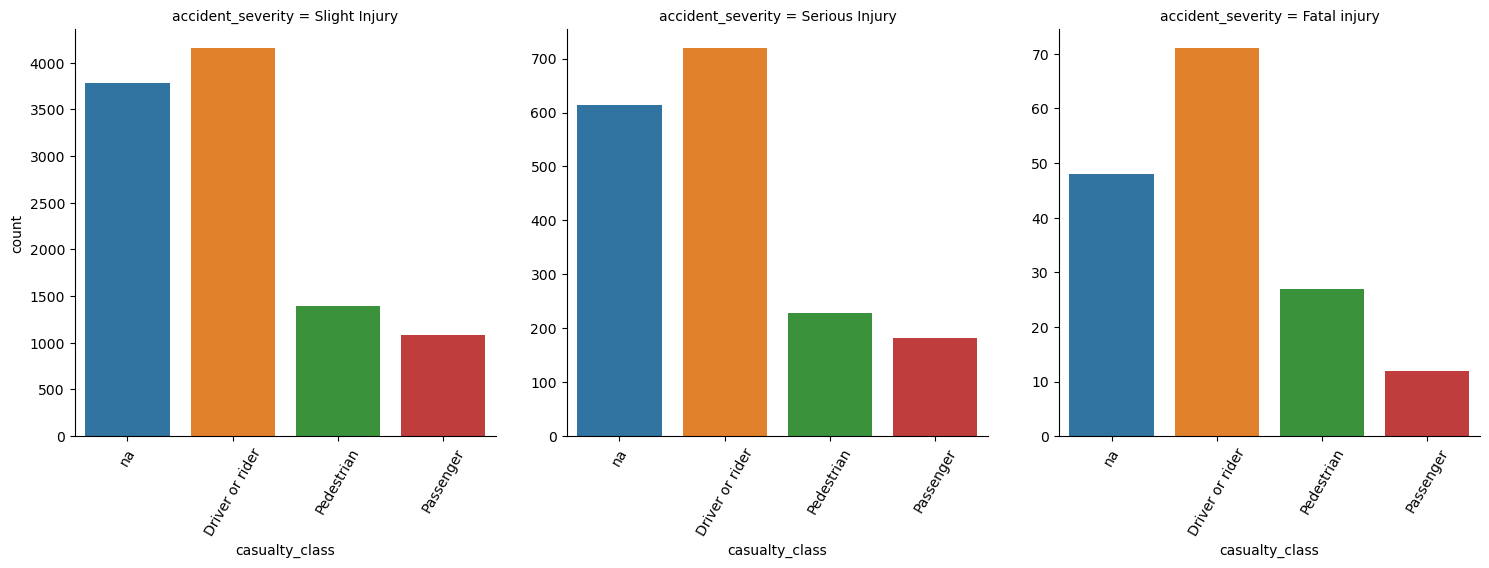

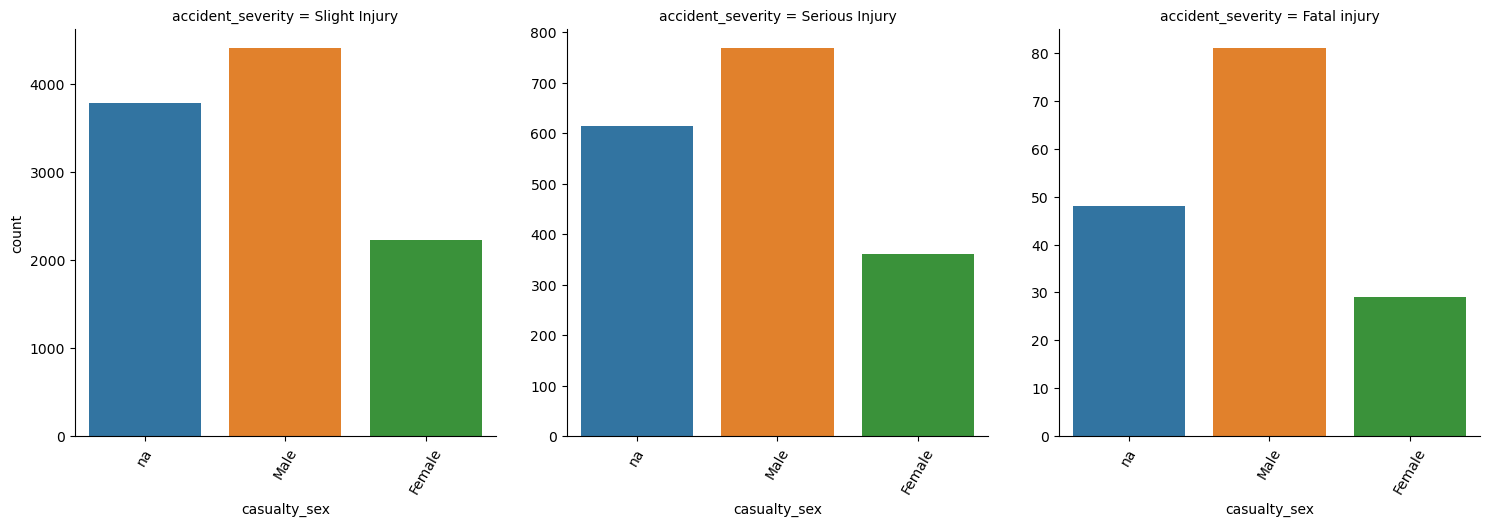

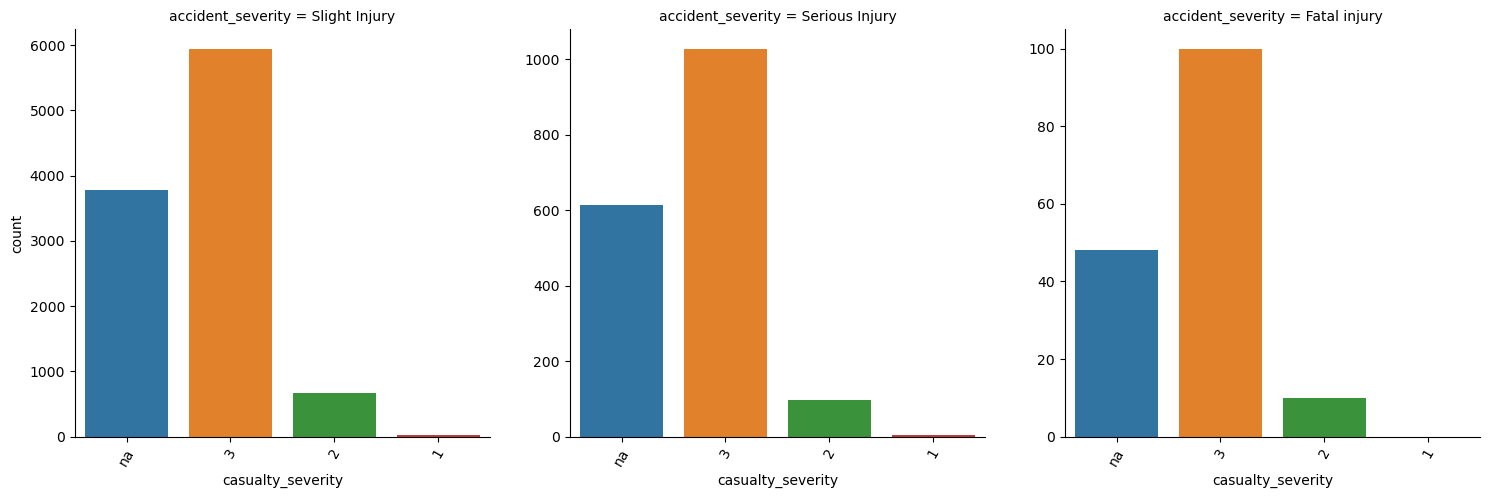

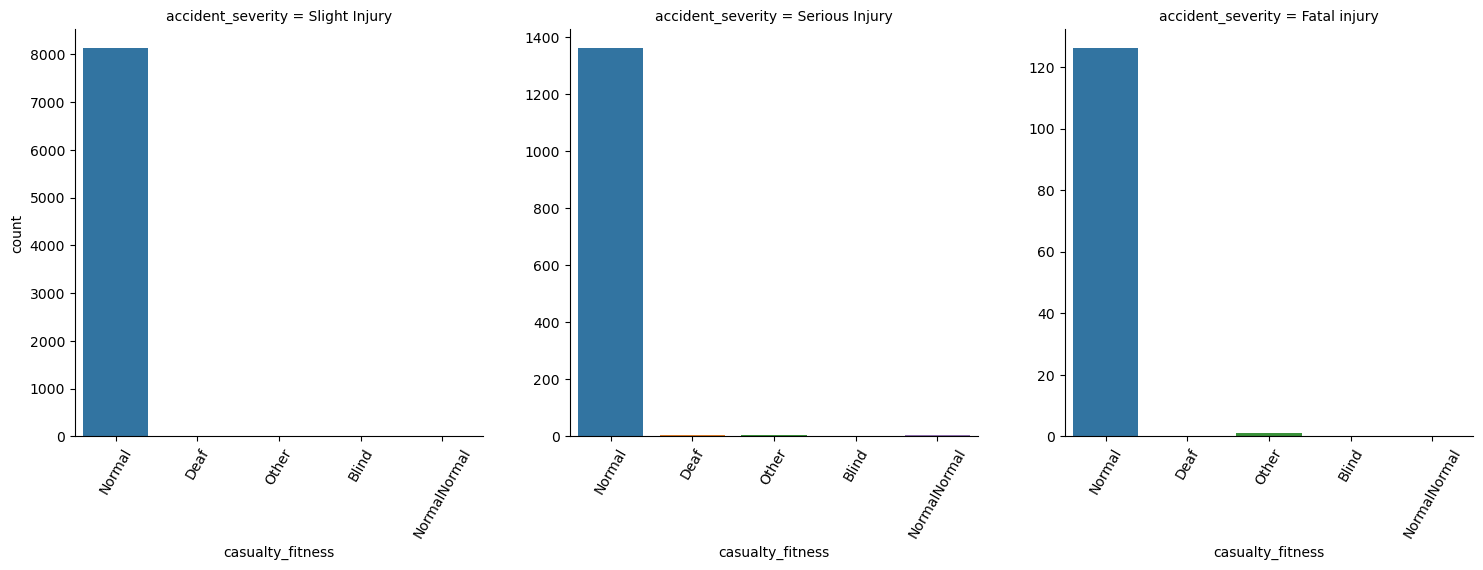

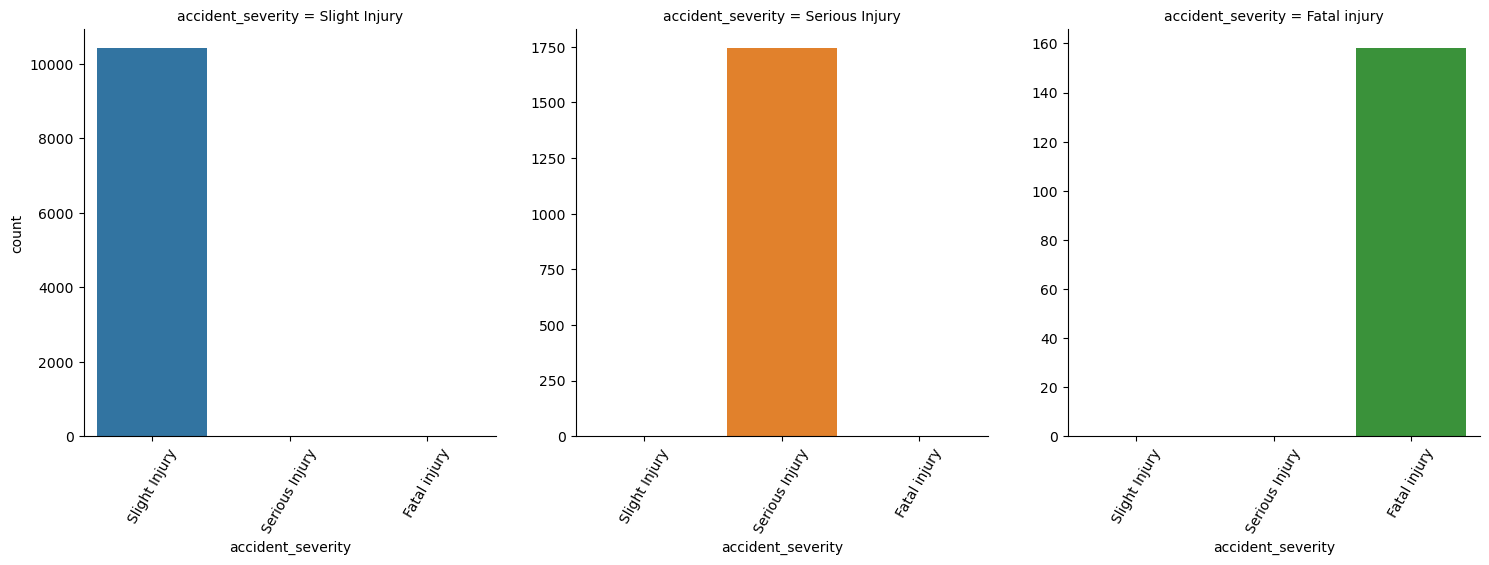

In [18]:
for col in road.select_dtypes(include='object'):
    if road[col].nunique() <= 5:
        g = sns.catplot(x = col, kind='count', col = 'accident_severity', data=road, sharey=False)
        g.set_xticklabels(rotation=60)

In [19]:
for col in road.select_dtypes(include='object'):
    if road[col].nunique() <= 5:
        display(road.groupby(col)[['vehicles_involved', 'casualties']].mean())


,vehicles_involved,casualties
driver_age,,
18-30,2.054554,1.573168
31-50,2.020798,1.565451
Over 51,2.031546,1.593060
Under 18,2.037576,1.695758
Unknown,2.065891,1.308786


,vehicles_involved,casualties
driver_sex,,
Female,2.158345,1.312411
Male,2.034537,1.563172
Unknown,1.971910,1.511236


,vehicles_involved,casualties
vehicle_driver_relation,,
Employee,2.038330,1.540667
Other,2.056911,1.634146
Owner,2.057780,1.589965
Unknown,1.714286,1.357143


,vehicles_involved,casualties
vehicle_owner,,
Governmental,1.994236,1.549472
Organization,2.166667,1.618590
Other,2.181818,1.590909
Owner,2.040730,1.546419


,vehicles_involved,casualties
vehicle_defect,,
5,2.166667,1.555556
7,2.078947,1.460526
No defect,2.028289,1.547383


,vehicles_involved,casualties
surface_type,,
Asphalt roads,2.042050,1.547539
Asphalt roads with some distress,2.012346,1.691358
Earth roads,1.977654,1.474860
Gravel roads,2.095041,1.508264
Other,2.029940,1.604790


,vehicles_involved,casualties
road_surface_conditions,,
Dry,2.048287,1.50546
Flood over 3cm. deep,2.000000,1.00000
Snow,2.642857,2.20000
Wet or damp,2.001722,1.67011


,vehicles_involved,casualties
light_condition,,
Darkness - lights lit,2.009130,1.637553
Darkness - lights unlit,2.150000,1.200000
Darkness - no lighting,1.859375,1.817708
Daylight,2.055922,1.510457


,vehicles_involved,casualties
casualty_class,,
Driver or rider,2.035599,1.553398
Passenger,2.054688,1.609375
Pedestrian,2.023044,1.534263
na,2.048841,1.529822


,vehicles_involved,casualties
casualty_sex,,
Female,2.037405,1.533206
Male,2.035408,1.571102
na,2.048841,1.529822


,vehicles_involved,casualties
casualty_severity,,
1,1.961538,1.384615
2,2.010376,1.544747
3,2.039146,1.560627
na,2.048841,1.529822


,vehicles_involved,casualties
casualty_fitness,,
Blind,1.944444,1.166667
Deaf,1.722222,1.833333
Normal,2.039134,1.548189
NormalNormal,2.157895,1.684211
Other,1.888889,1.444444


,vehicles_involved,casualties
accident_severity,,
Fatal injury,1.797468,2.341772
Serious Injury,1.895009,1.535284
Slight Injury,2.068747,1.538262


In [20]:
corr = road.corr()
corr

,vehicles_involved,casualties
vehicles_involved,1.000000,0.213427
casualties,0.213427,1.000000


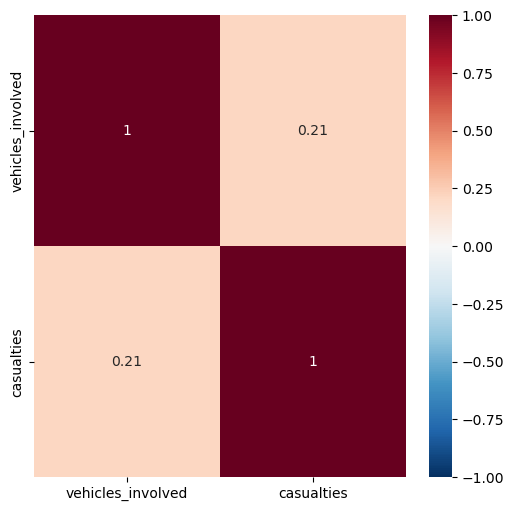

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

## Missing Values Handling

In [22]:
road.isnull().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [23]:
road.isna().sum().sum()

20057

In [24]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [25]:
road_missing= missing_values_table(road)
road_missing

Your selected dataframe has 32 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
vehicle_defect,4427,35.9
service_year,3928,31.9
casualty_work,3198,26.0
casualty_fitness,2635,21.4
vehicle_type,950,7.7
junction_type,887,7.2
driving_experience,829,6.7
educational_level,741,6.0
vehicle_driver_relation,579,4.7
vehicle_owner,482,3.9


In [26]:
# Dropping vehicle_defect, service_year, casualty_work, casualty fitness from the dataset considering ~25% of data is missing & imputation of it affects the balance in dataset

road.drop(columns = ['vehicle_defect', 'service_year', 'casualty_work', 'casualty_fitness'], inplace=True)

In [27]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   accident_area            12077 non-null  object
 10  lanes                    11931 non-null  object
 11  road_allignment          12174 non-null  object
 12  junction_type            11429 non-null  object
 13  surface_type             12144 non-null  object
 14  road_surface_conditions  12316 non-nul

In [28]:
impute_cols = [x for x in road.isna().sum()[road.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = road[feat].mode()[0]
    road[feat].fillna(mode, inplace=True)

In [29]:
road.isnull().sum()

time                       0
day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
vehicle_driver_relation    0
driving_experience         0
vehicle_type               0
vehicle_owner              0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
dtype: int64

## Working on time,data features

In [30]:
road['time'] = pd.to_datetime(road['time'])

# date (day-month-year) time
road["time"].dt.hour

0        17
1        17
2        17
3         1
4         1
         ..
12311    16
12312    18
12313    13
12314    13
12315    13
Name: time, Length: 12316, dtype: int64

In [31]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time                     12316 non-null  datetime64[ns]
 1   day_of_week              12316 non-null  object        
 2   driver_age               12316 non-null  object        
 3   driver_sex               12316 non-null  object        
 4   educational_level        12316 non-null  object        
 5   vehicle_driver_relation  12316 non-null  object        
 6   driving_experience       12316 non-null  object        
 7   vehicle_type             12316 non-null  object        
 8   vehicle_owner            12316 non-null  object        
 9   accident_area            12316 non-null  object        
 10  lanes                    12316 non-null  object        
 11  road_allignment          12316 non-null  object        
 12  junction_type            12316 n

In [32]:
road['hour'] = road['time'].dt.hour
road['minute'] = road['time'].dt.minute
road.drop('time', axis=1, inplace=True)

In [33]:
road.head(5)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,accident_area,lanes,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),...,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,other,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,1,6


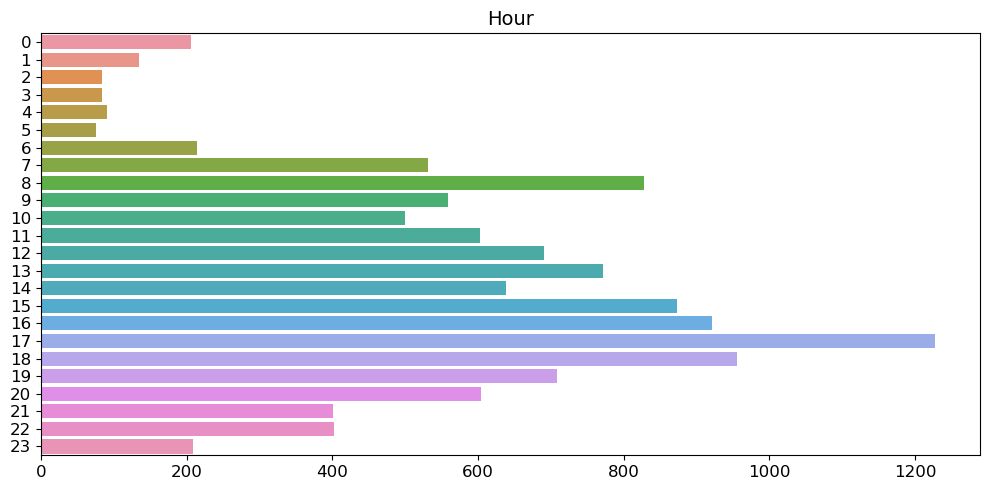

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=road, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

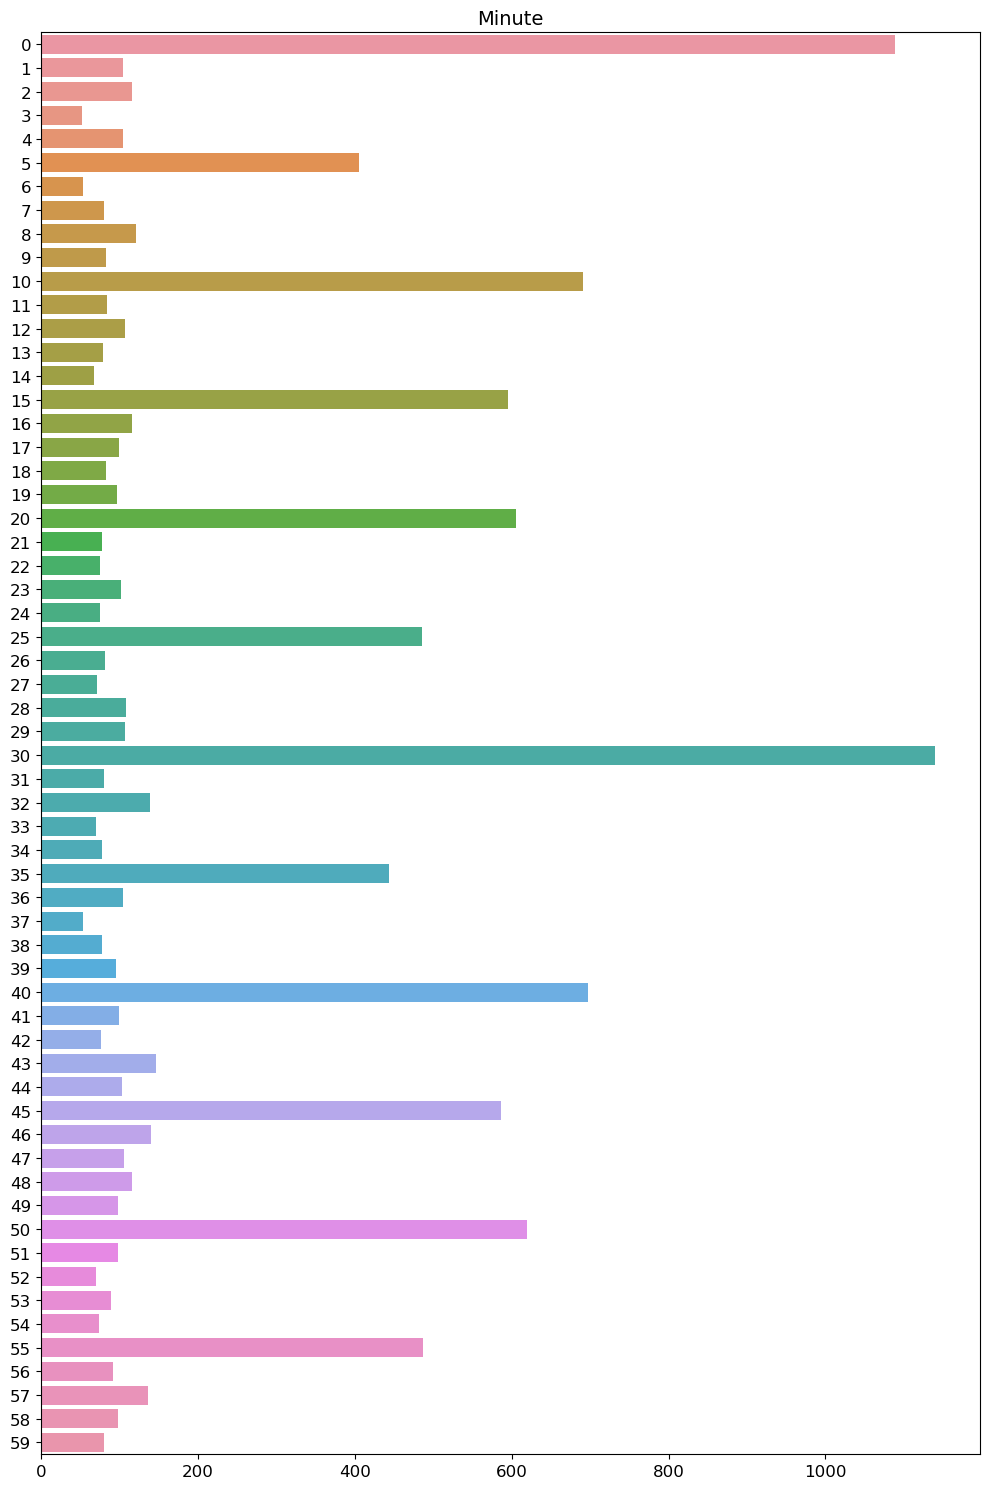

In [35]:
plt.figure(figsize=(10,15))
sns.countplot(data=road, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [36]:
#Most of the accidents have taken place between 3pm to 6pm with maximum numbers at 5 pm
#Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.

In [37]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [38]:
road['minute'] = road['minute'].apply(lambda x: convert_minutes(x))

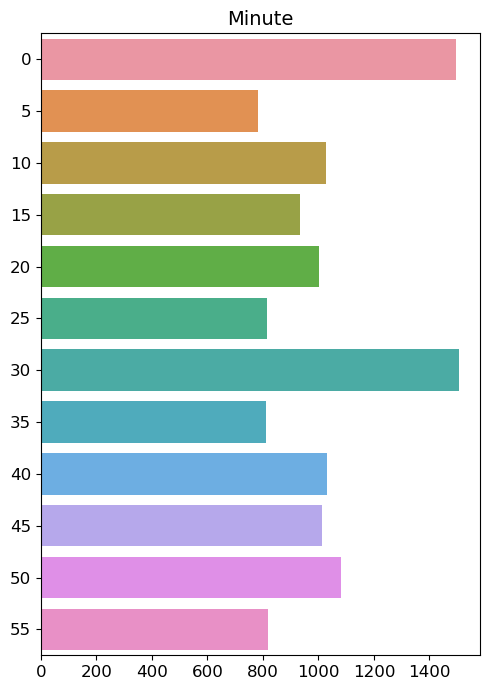

In [39]:
plt.figure(figsize=(5,7))
sns.countplot(data=road, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [40]:
road.head(5)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,accident_area,lanes,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),...,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury,17,5
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,17,5
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17,5
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1,10
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,other,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,1,10


In [41]:
road.isnull().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
vehicle_driver_relation    0
driving_experience         0
vehicle_type               0
vehicle_owner              0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

## Encoding

In [42]:
## For ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = pd.DataFrame(encoder.fit_transform(road))


In [43]:
encoder.n_features_in_

29

In [44]:
encoder.feature_names_in_

array(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'accident_area', 'lanes', 'road_allignment',
       'junction_type', 'surface_type', 'road_surface_conditions',
       'light_condition', 'weather_condition', 'collision_type',
       'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age',
       'casualty_severity', 'pedestrian_movement', 'accident_cause',
       'accident_severity', 'hour', 'minute'], dtype=object)

In [45]:
encoder.categories_

[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object),
 array(['18-30', '31-50', 'Over 51', 'Under 18', 'Unknown'], dtype=object),
 array(['Female', 'Male', 'Unknown'], dtype=object),
 array(['Above high school', 'Elementary school', 'High school',
        'Illiterate', 'Junior high school', 'Unknown', 'Writing & reading'],
       dtype=object),
 array(['Employee', 'Other', 'Owner', 'Unknown'], dtype=object),
 array(['1-2yr', '2-5yr', '5-10yr', 'Above 10yr', 'Below 1yr',
        'No Licence', 'unknown'], dtype=object),
 array(['Automobile', 'Bajaj', 'Bicycle', 'Long lorry', 'Lorry (11?40Q)',
        'Lorry (41?100Q)', 'Motorcycle', 'Other', 'Pick up upto 10Q',
        'Public (12 seats)', 'Public (13?45 seats)', 'Public (> 45 seats)',
        'Ridden horse', 'Special vehicle', 'Stationwagen', 'Taxi', 'Turbo'],
       dtype=object),
 array(['Governmental', 'Organization', 'Other', 'Owner'], dtype=object),
 array(['  Market areas', '

In [46]:
## Reference

# For ordinal Encoding, Feature names cant be retrieved directly & also get feature names out option doesnt work here, 
# we need to assign separately as below result.columns=road.columns
# But for one hot encoding, get feature names out option works well as below
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# henc = OneHotEncoder(sparse=False)
# x_cat_df = pd.DataFrame(ohenc.fit_transform(road))
# x_cat_df.columns = ohenc.get_feature_names_out(input_features=road.columns)

In [47]:
result

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,9.0,2.0,...,2.0,3.0,2.0,5.0,3.0,5.0,9.0,2.0,17.0,1.0
1,1.0,1.0,1.0,4.0,0.0,3.0,11.0,3.0,6.0,4.0,...,2.0,3.0,2.0,5.0,3.0,5.0,16.0,2.0,17.0,1.0
2,1.0,0.0,1.0,4.0,0.0,0.0,5.0,3.0,1.0,6.0,...,2.0,0.0,1.0,1.0,2.0,5.0,0.0,1.0,17.0,1.0
3,3.0,0.0,1.0,4.0,0.0,2.0,11.0,0.0,6.0,6.0,...,2.0,2.0,0.0,0.0,2.0,5.0,1.0,2.0,1.0,2.0
4,3.0,0.0,1.0,4.0,0.0,1.0,0.0,3.0,4.0,6.0,...,2.0,3.0,2.0,5.0,3.0,5.0,16.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6.0,1.0,1.0,4.0,0.0,1.0,4.0,3.0,5.0,4.0,...,2.0,3.0,2.0,5.0,3.0,5.0,10.0,2.0,16.0,3.0
12312,3.0,4.0,1.0,1.0,0.0,2.0,0.0,3.0,5.0,2.0,...,4.0,3.0,2.0,5.0,3.0,5.0,10.0,2.0,18.0,0.0
12313,3.0,2.0,1.0,4.0,0.0,2.0,1.0,3.0,5.0,2.0,...,4.0,0.0,1.0,1.0,2.0,5.0,1.0,1.0,13.0,11.0
12314,3.0,0.0,0.0,4.0,0.0,3.0,5.0,3.0,6.0,4.0,...,4.0,3.0,2.0,5.0,3.0,5.0,5.0,2.0,13.0,11.0


In [48]:
result.columns = road.columns

In [49]:
result.head(5)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,accident_area,lanes,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,9.0,2.0,...,2.0,3.0,2.0,5.0,3.0,5.0,9.0,2.0,17.0,1.0
1,1.0,1.0,1.0,4.0,0.0,3.0,11.0,3.0,6.0,4.0,...,2.0,3.0,2.0,5.0,3.0,5.0,16.0,2.0,17.0,1.0
2,1.0,0.0,1.0,4.0,0.0,0.0,5.0,3.0,1.0,6.0,...,2.0,0.0,1.0,1.0,2.0,5.0,0.0,1.0,17.0,1.0
3,3.0,0.0,1.0,4.0,0.0,2.0,11.0,0.0,6.0,6.0,...,2.0,2.0,0.0,0.0,2.0,5.0,1.0,2.0,1.0,2.0
4,3.0,0.0,1.0,4.0,0.0,1.0,0.0,3.0,4.0,6.0,...,2.0,3.0,2.0,5.0,3.0,5.0,16.0,2.0,1.0,2.0


<AxesSubplot:>

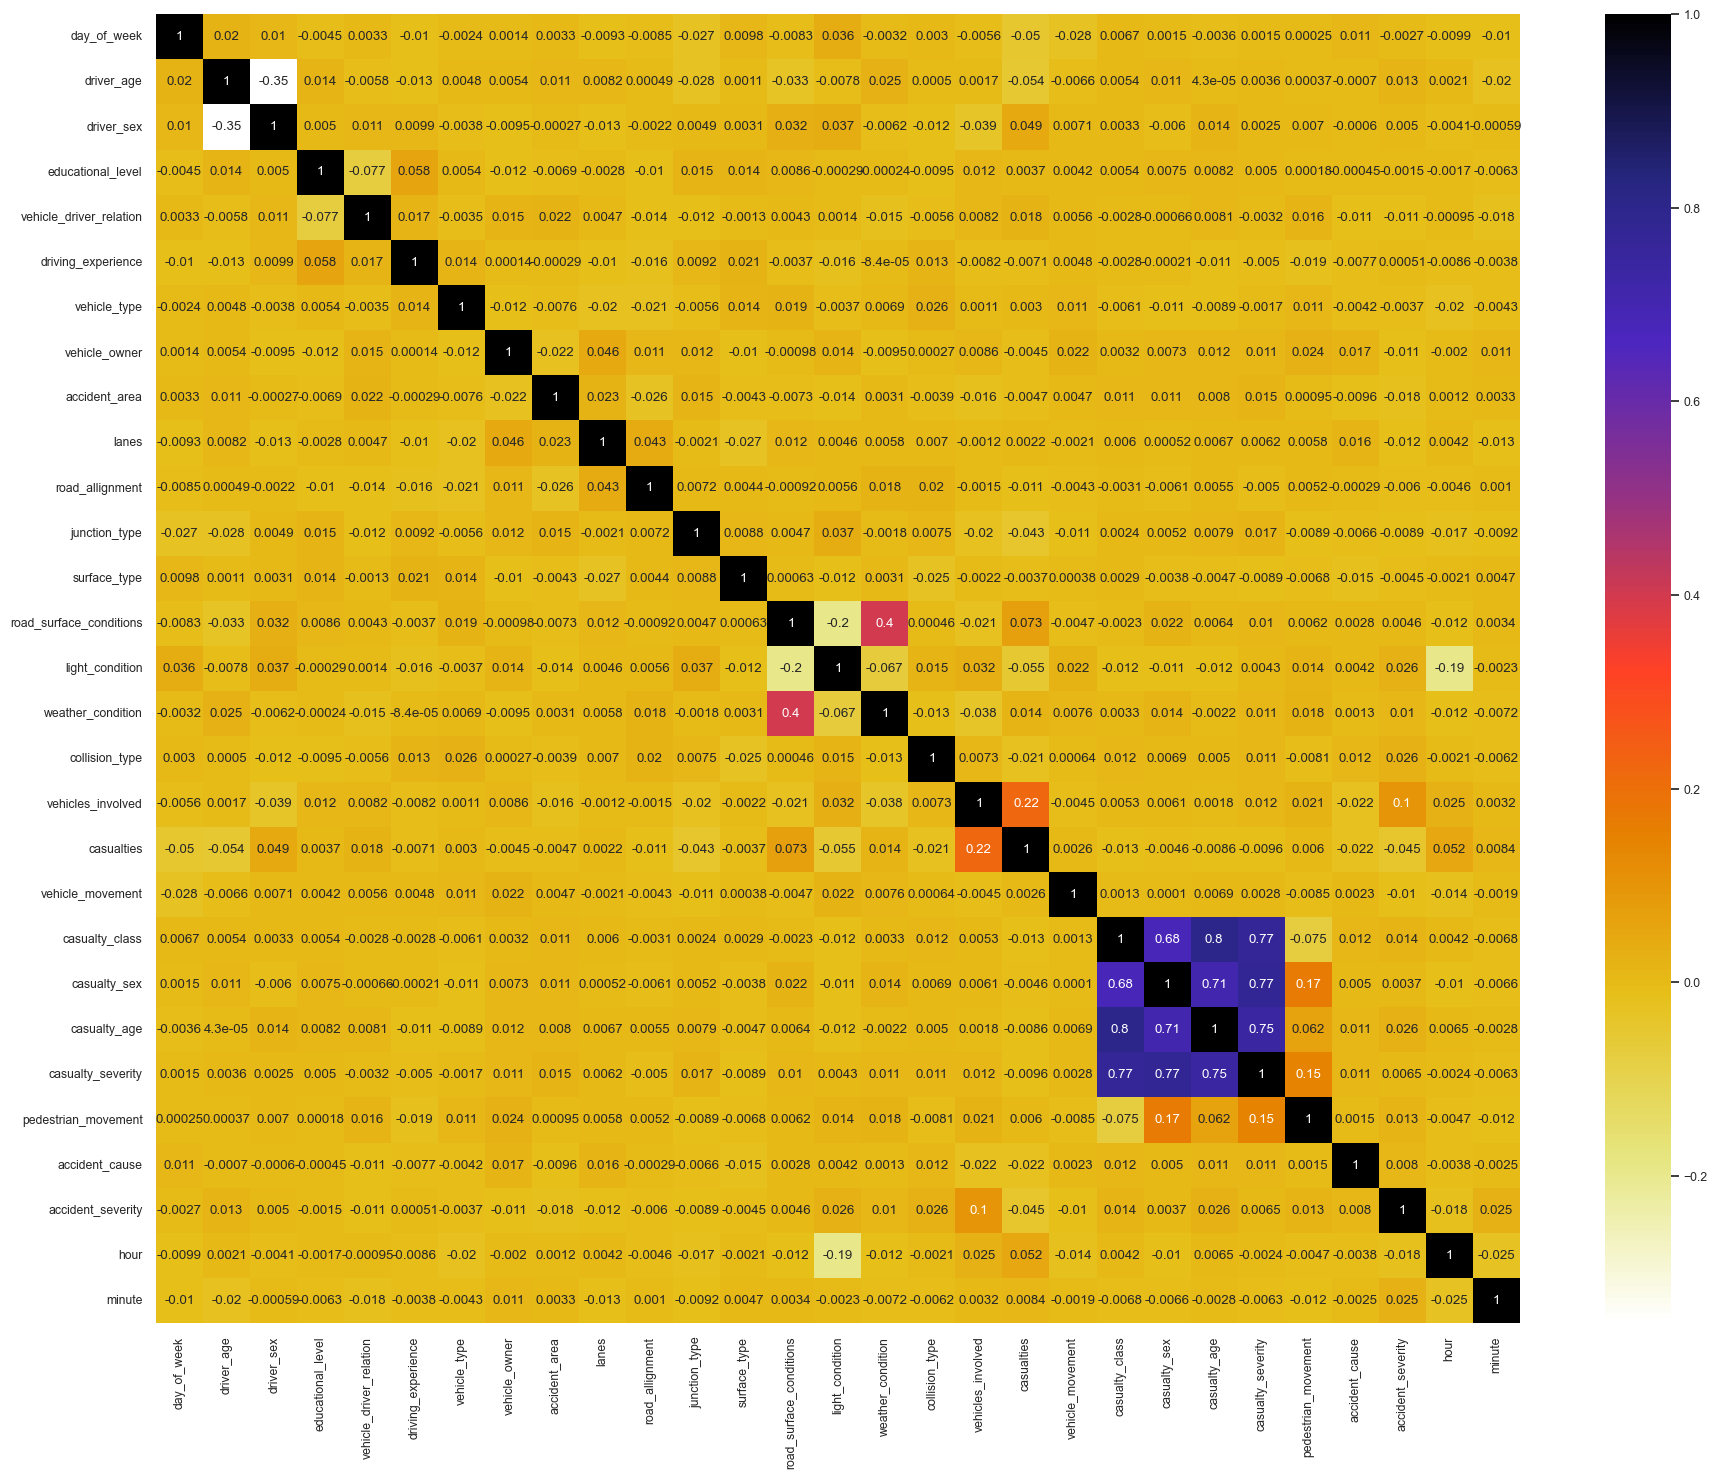

In [50]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(result.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [51]:
result['accident_severity'].value_counts()

2.0    10415
1.0     1743
0.0      158
Name: accident_severity, dtype: int64

In [52]:
# Since Target feature is unbalanced one, using SMOTE technique to upsample

In [53]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
X = result.drop('accident_severity', axis=1)
y = result['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [55]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 2.0, n=7324 (84.96%)
Class= 1.0, n=1191 (13.82%)
Class= 0.0, n=106 (1.23%)
Class= 2.0, n=7324 (33.33%)
Class= 1.0, n=7324 (33.33%)
Class= 0.0, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [56]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [57]:
from xgboost import XGBClassifier

# Modelling

In [58]:
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average='weighted')
    rec = metrics.recall_score(y_test, y_pred,average='weighted')
    f1 = metrics.f1_score(y_test, y_pred,average='weighted')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'cm': cm}

In [59]:
#Decision Tree

#Model

from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [60]:
# Evaluate Model
dtc_eval = evaluate_model (dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.7315290933694182
Precision: 0.7508583496378144
Recall: 0.7315290933694182
F1 Score: 0.740678320970502
Cohens Kappa Score: 0.10205857451945699
Confusion Matrix:
 [[  12   13   27]
 [  13  137  402]
 [  60  477 2554]]


In [61]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [62]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8414073071718539
Precision: 0.8203474794055504
Recall: 0.8414073071718539
F1 Score: 0.779937509629158
Cohens Kappa Score: 0.07924050428365548
Confusion Matrix:
 [[   1    1   50]
 [   0   31  521]
 [   0   14 3077]]


In [63]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [64]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.352638700947226
Precision: 0.7378882610596689
Recall: 0.352638700947226
F1 Score: 0.4565946271588347
Cohens Kappa Score: 0.01720189135295236
Confusion Matrix:
 [[  30    8   14]
 [ 221  152  179]
 [1181  789 1121]]


In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.4719891745602165
Precision: 0.7351625092919065
Recall: 0.4719891745602165
F1 Score: 0.5500441644824703
Cohens Kappa Score: 0.0226560071322659
Confusion Matrix:
 [[  13   20   19]
 [  66  242  244]
 [ 343 1259 1489]]


In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda =LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [68]:
# Evaluate Model
lda_eval = evaluate_model(lda, X_test, y_test)

# Print result
print('Accuracy:', lda_eval['acc'])
print('Precision:', lda_eval['prec'])
print('Recall:', lda_eval['rec'])
print('F1 Score:', lda_eval['f1'])
print('Cohens Kappa Score:', lda_eval['kappa'])
print('Confusion Matrix:\n', lda_eval['cm'])

Accuracy: 0.4422192151556157
Precision: 0.7601591342740428
Recall: 0.4422192151556157
F1 Score: 0.532781981158598
Cohens Kappa Score: 0.05404225348613623
Confusion Matrix:
 [[  31   15    6]
 [ 140  223  189]
 [ 701 1010 1380]]


In [69]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [70]:
# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.43437077131258456
Precision: 0.7629012921285913
Recall: 0.43437077131258456
F1 Score: 0.5285863808694166
Cohens Kappa Score: 0.05167488051917657
Confusion Matrix:
 [[  32   14    6]
 [ 167  206  179]
 [ 742  982 1367]]


In [71]:
import xgboost as xgb 
clfXGB=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [72]:
# Evaluate Model
xgb_eval = evaluate_model(clfXGB, X_test, y_test)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.8010825439783491
Precision: 0.7670507473585345
Recall: 0.8010825439783491
F1 Score: 0.7711580429296253
Cohens Kappa Score: 0.12276975841344162
Confusion Matrix:
 [[  25    1   26]
 [  13   58  481]
 [ 111  103 2877]]


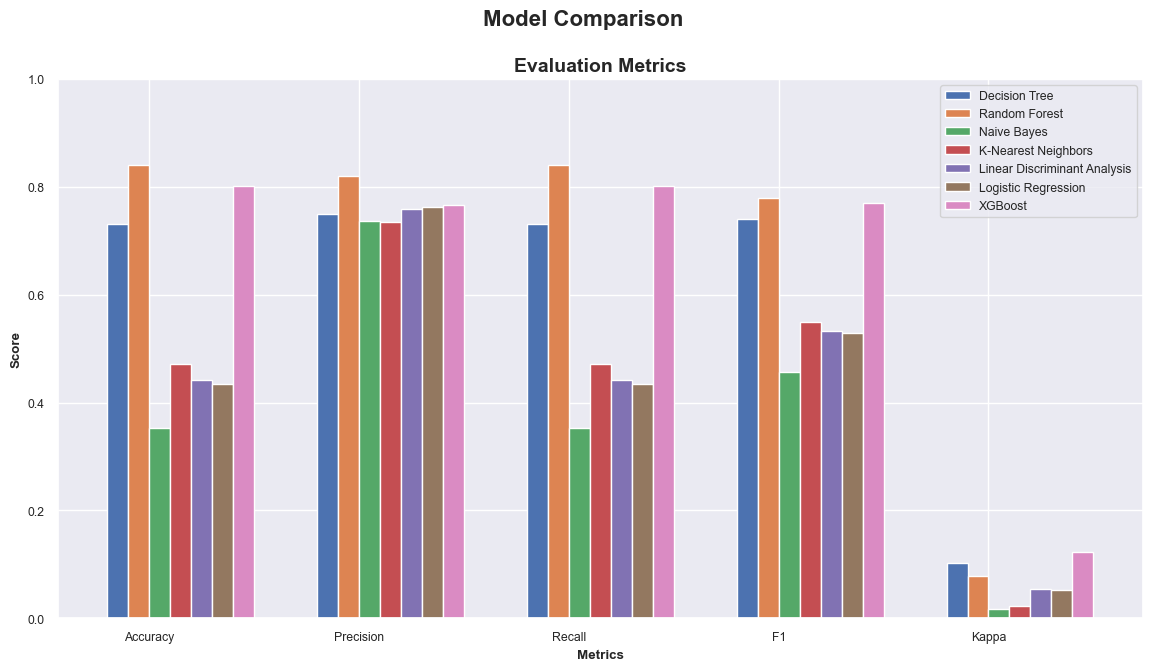

In [73]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
lda_score = [lda_eval['acc'], lda_eval['prec'], lda_eval['rec'], lda_eval['f1'], lda_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
clfXGB_score = [xgb_eval['acc'], xgb_eval['prec'], xgb_eval['rec'], xgb_eval['f1'], xgb_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]


## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r5, lda_score, width=barWidth, edgecolor='white', label='Linear Discriminant Analysis')
ax1.bar(r6, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r7, clfXGB_score, width=barWidth, edgecolor='white', label='XGBoost')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

In [74]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [75]:
## Hyperp parameter tuning

In [76]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


{'max_depth': 50,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [77]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.8365358592692829
Precision: 0.7797309418645232
Recall: 0.8365358592692829
F1 Score: 0.7675721063940723
Cohens Kappa Score: 0.024630507425688508
Confusion Matrix:
 [[   0    0   52]
 [   0   11  541]
 [   1   10 3080]]


In [78]:
best_grid

RandomForestClassifier(max_depth=50, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, random_state=0)

In [79]:
import pickle

In [80]:
pickle.dump(best_grid,open('rtamodel.pkl','wb'))

In [81]:
pickled_model=pickle.load(open('rtamodel.pkl','rb'))